## Homework 01: First Steps with Linear Regression

This homework will introduce you to foundational techniques in downloading and setting up datasets, running `sklearn` models, and examining their results. The primary goal is to establish the workflow for accessing and submitting assignments, writing basic code, and interpreting outputs. This assignment will also help us test the autograder and ensure that feedback mechanisms work seamlessly.

### Submission Instructions via Gradescope

We will use Gradescope for homework submissions this term. Please follow these instructions carefully:

1. **Do not rename the file**  
   - Renaming the notebook (`Homework01.ipynb`) will cause the autograder to fail.

2. **Include the `requirements.txt` file**  
   - Download both `Homework01.ipynb` and `requirements.txt` from the GitHub repository.  
   - The `requirements.txt` file specifies the dependencies (imported libraries) required for grading.  
   - **Do not modify this file** unless explicitly instructed by the LFs.

3. **Verify before submission**  
   - Before submitting, run `Restart Kernel and Run All` to ensure that all cells execute without errors.

4. **Submitting to Gradescope**  
   - You should have received an email inviting you to join Gradescope. If not, please contact us immediately.  
   - Log in to [Gradescope](https://gradescope.com), navigate to your dashboard, and locate **Homework 01**.  
   - Drag and drop the following files into the upload section:
     - `Homework01.ipynb`
     - `requirements.txt`
   - Or, you may zip up a folder containing these two files and submit that.
   - Click `Upload` to submit your files.

5. **Review your submission**  
   - You will receive the autograder results and a confirmation email after submission.  
   - For the first two homeworks, **multiple resubmissions** will be allowed. Use this opportunity to get your debugging and submission workflow established.   
   - Starting from Homework 03, **only one submission will be permitted.** You will need to ensure that your work is complete and carefully verified before uploading.

In [37]:
# Initialize Otter
import otter
grader = otter.Notebook("Homework_01.ipynb")

In [38]:
# Useful imports and utilities

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from tqdm import tqdm


## Problem:  Linear Regression on the Kaggle Salary Dataset

This is a great dataset to start with: it is a univariate regression dataset predicting salary from years of experience. It is probably the smallest dataset on Kaggle!

### (A) Install `kagglehub` if you don't already have it

The first thing to do is to install `kagglehub` if you don't have it already. If you *do*, make sure you have the most recent version.

In [39]:
# Since you only need to do this once, uncomment the following line, run the cell, and then recomment or delete this cell.
# Or do this the usual way you do installs (e.g., in Terminal on a Mac). 

#pip install kagglehub


In [40]:

import kagglehub
print("Kagglehub version:", kagglehub.__version__)
  

Kagglehub version: 0.3.6


In [41]:
# If you need to upgrade, uncomment and run this cell, then delete or recomment.
# But do not worry excessively about upgrading to the most recent version at this point, 
# even if you get "Warning: Looks like you're using an outdated...." when you download the dataset.

# !pip install --upgrade kagglehub


### (B) Download the dataset and prepare it for modeling.

Continue running cells as shown, following the instructions in text cells and comments in code cells (usually "Your code here"), and then answer the questions below.

#### B.1 Download

In [42]:
# Download latest version, which will be installed on your local machine
# After running this cell once, you could comment this out.  

salary_dataset_path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", salary_dataset_path)

Path to dataset files: /Users/augustasfour/.cache/kagglehub/datasets/abhishek14398/salary-dataset-simple-linear-regression/versions/1


In [43]:
# Assuming the dataset is named "Salary_dataset.csv" inside the path
salary_dataset_path_to_file = os.path.join(salary_dataset_path, "Salary_dataset.csv")
salary_data_raw = pd.read_csv(salary_dataset_path_to_file)

#### B.2  Print out the head and info about the dataset

In [44]:
# Your code here
print(salary_data_raw.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [45]:
print(salary_data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


#### B.3  Using Pandas `hist()`, display histograms of the columns.  Set the `bins` parameter to make the visualization as useful as possible (YMMV, so don't stress about it).

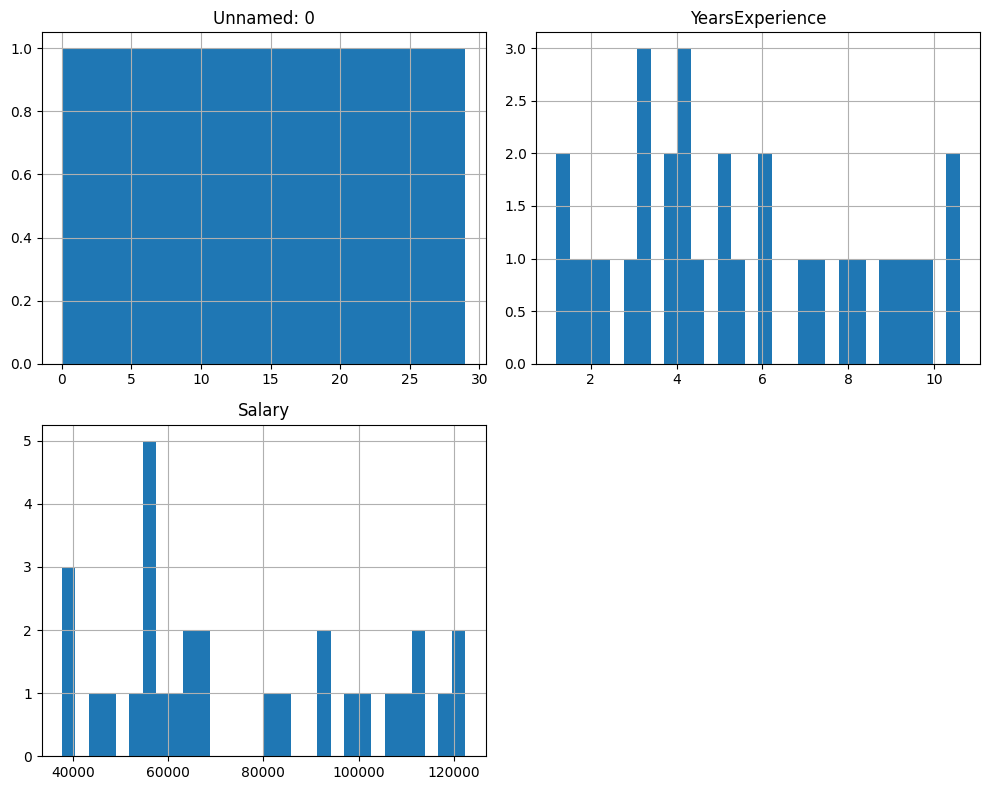

In [46]:
# Your code here
#import pandas as pd
#import matplotlib.pyplot as plt
#dataset name is salary_data_raw
#since range index is 30, let's make 30 bins?

salary_data_raw.hist(bins=30, figsize=(10,8))
plt.tight_layout()
plt.show()

#### B.4  Print out some simple stats about the data

**Set the variable b4_a to the maximum salary in the dataset as an integer.**

In [47]:
maximum_salary_and_years = salary_data_raw.max()
maximum_salary_and_years

Unnamed: 0             29.0
YearsExperience        10.6
Salary             122392.0
dtype: float64

In [48]:
#Your code here
b4_a = 122392.0
b4_a

122392.0

**Set the variable b4_b to the average years of experience in the dataset as a floating point number to 2 decimal places.** 

In [49]:
average_salary_and_years = salary_data_raw.mean()
average_salary_and_years

Unnamed: 0            14.500000
YearsExperience        5.413333
Salary             76004.000000
dtype: float64

In [50]:
average_rounded = average_salary_and_years.round(2)
average_rounded

Unnamed: 0            14.50
YearsExperience        5.41
Salary             76004.00
dtype: float64

In [51]:
# Your code here
b4_b = 5.41
b4_b

5.41

### (C) Clean the data

There seems to be a problem, namely an extra column that is completely unnecesssary! 

1. Remove that column using appropriate Pandas code and assign the result to a new variable `salary_data`;
2. Check to see all is well, by setting the variable c1 to a **Python list** of the feature names in the new dataframe and then printing it (you might want to do this before and after, just to get the precise name of the column to remove). (Hint: if your value is in the form `Index(...)` then it is not a Python list.)

In [52]:
column_names = salary_data_raw.columns
#column_names

In [53]:
salary_data = salary_data_raw.drop("Unnamed: 0", axis=1)


In [54]:
# Your code here
c1 = salary_data.columns.tolist()
c1

['YearsExperience', 'Salary']

**Set the variable c2 to the shape (number of rows and columns) of the dataset (e.g., in form (rows, columns)).** 

In [55]:
# Your code here
c2 = salary_data.shape
c2

(30, 2)

### (D) Convert the dataframe to (X,y) form for processing. 

Create a numpy array `X` from the first column and array `y` from the second column. Create `X` by deleting the second column from a copy of the dataframe, **not** by just selecting the first column (which won't work when there is more than one feature). 

Confirm by setting the variable `d1` to the shape of `X` and `d2` to the shape of `y` and printing them.

In [56]:
salary_data_copy = salary_data.copy()
X = salary_data_copy.drop("Salary", axis=1)
#another way to drop a column without a name is the following code
#X = salary_data_copy.drop(salary_data_copy.columns[1], axis=1)
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [57]:
salary_data_copy_2 = salary_data.copy()
y = salary_data_copy_2.drop("YearsExperience", axis=1)
#y = salary_data_copy_2.drop(salary_data_copy_2.columns[0], axis=1)
y

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0
5,56643.0
6,60151.0
7,54446.0
8,64446.0
9,57190.0


In [58]:
# Your code here

d1 = X.shape
d2 = y.shape
d1

(30, 1)

In [59]:
d2

(30, 1)

### (E) Display the data as a scatterplot

Display a scatterplot of the data using appropriate title and axis labels.  YMMV, but make it attractive!

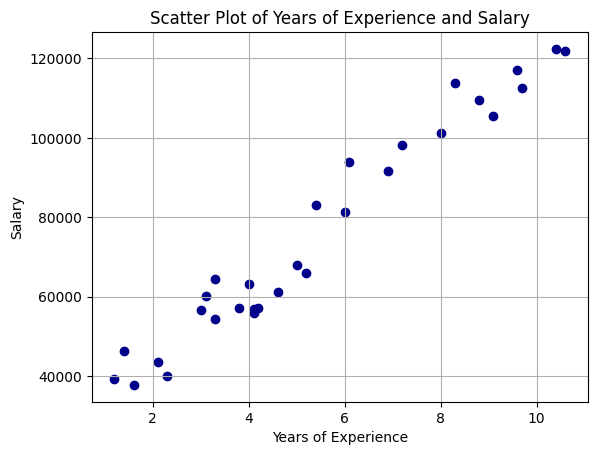

In [60]:
# Your code here
plt.scatter(X,y, color="darkblue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Scatter Plot of Years of Experience and Salary")
plt.grid()
plt.show()

 ### (F) Linear Regression in Sklearn
 
Now we will run linear regression on the dataset, plot the regression line, and print out the intercept and slope of the
least-squares line with some evaluation metrics.

Train your model on the whole dataset, and set `f1` to the intercept (a float) rounded to 4 decimal places (note: `sklearn` stores the intercept/bias separately from the coefficients)

In [61]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [62]:
# Your code here
f1 = round(float(model.intercept_), 4)
#the intercept means intercept and the [0] means that we can take the element explicitily
f1

/var/folders/dj/98fc07q174v2g56bdt5hzd8h0000gn/T/ipykernel_86603/2653840982.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f1 = round(float(model.intercept_), 4)


24848.204

Set `f2` to the slope (a float), rounded to 4 decimal places.

In [63]:
# Your code here
f2 = round(float(model.coef_), 4)
#similar to the intercept, the coef is the slope and so taking [0] means extracting the first coefiicient 
f2

/var/folders/dj/98fc07q174v2g56bdt5hzd8h0000gn/T/ipykernel_86603/476754659.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f2 = round(float(model.coef_), 4)


9449.9623

Set `f3` to the mean square error (a float) of the model on the whole dataset, rounded to 4 decimal places.
Hint: predict the results on the whole dataset to get `y_pred`, then calculate MSE from `y` and `y_pred`.

In [64]:
# Your code here
y_pred = model.predict(X)
f3 = round(float(mean_squared_error(y, y_pred)), 4)
f3

31270951.7223

Set `f4` to the mean absolute error (a float) of the model on the whole dataset, rounded to 4 decimal places.

In [65]:
# Your code here
f4 = round(float(mean_absolute_error(y,y_pred)), 4)
f4

4644.2013

Set `f5` to the R2 score (a float) for the model on the whole dataset, rounded to 4 decimal places. 

In [66]:
# Your code here
f5 = round(r2_score(y, y_pred), 4)
f5

0.957

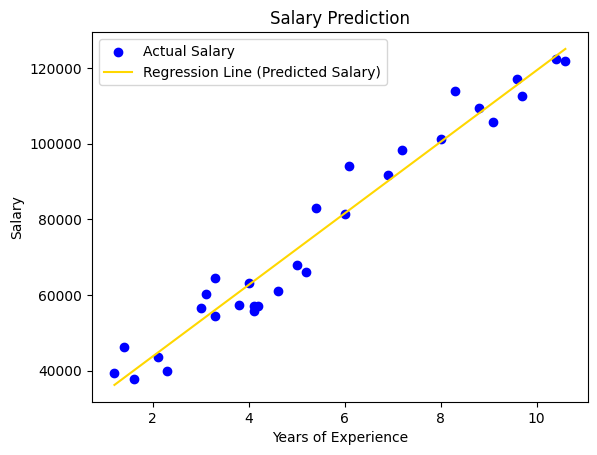

In [67]:
plt.scatter(X, y, color="blue", label = "Actual Salary")
plt.plot(X, y_pred, color="gold", label = "Regression Line (Predicted Salary)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.legend()
plt.show()